## CR

Links:
* https://data.gov.cz/
    

### CR - vyvoj poctu obyvatel v Brne

{2001: 373272, 2002: 370505, 2003: 369559, 2004: 367729, 2005: 366757, 2006: 366680, 2007: 368533, 2008: 370592, 2009: 371399, 2010: 371371, 2011: 378965, 2012: 378327, 2013: 377508, 2014: 377440, 2015: 377028, 2016: 377549, 2017: 379527}


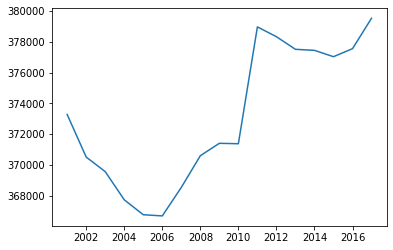

In [43]:
import numpy as np
import matplotlib.pyplot as plt 

year_to_count = {}
with open('/Users/jumar/Private/edu/DataScience/datasets/CR/vyvoj-poctu-obyvatel-v-brne_2.csv') as f:
    raw_data = f.readlines()[1:]
    for citizen_count_in_year in raw_data:
        year, count = citizen_count_in_year.rstrip('\n;').split(';') 
        year_to_count[int(year)] = int(count);
print(year_to_count)

# https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
plt.plot(list(year_to_count.keys()), list(year_to_count.values()))

## SK

### SK - komunalny odpad

See http://statdat.statistics.sk/cognosext/cgi-bin/cognos.cgi?b_action=cognosViewer&ui.action=run&ui.object=storeID(%22i57F8D1568E444621B1FC04094207561E%22)&ui.name=Mno%c5%bestvo%20komun%c3%a1lneho%20odpadu%20(v%20ton%c3%a1ch)%20%5bzp3001rr%5d&run.outputFormat=&run.prompt=true&cv.header=false&ui.backURL=%2fcognosext%2fcps4%2fportlets%2fcommon%2fclose.html#
    

In [33]:
# Download dataset and load it 

# encoding autodetection: https://pypi.org/project/chardet/
import chardet

with open('/Users/jumar/Private/edu/DataScience/datasets/SK/STATdat/Množstvo komunálneho odpadu (v tonách) [zp3001rr].csv', 'rb') as f:
    data = f.read()
    encoding = (chardet.detect(data))

# it detects 'Windows-1252' but in reality it's Windows-1250!
print(encoding)
    
with open('/Users/jumar/Private/edu/DataScience/datasets/SK/STATdat/Množstvo komunálneho odpadu (v tonách) [zp3001rr].csv',
         encoding='Windows-1250') as f:
    # the first field is always irrelevant
    lines = [l.rstrip().split(';')[1:] for l in f.readlines()]
        
years = lines[0][1:]
print("header:\n", header)

dict()
print("data:")
for d in lines[1:]:
    print(d)




{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
header:
 ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
data
['Komunálny odpad spolu', '1524404', '1599377', '1475123', '1558263', '1623306', '1668648', '1772426', '1745494', '1808506', '1766990', '1750775', '1744429', '1830167', '1888456', '1953478', '2136952', '2325178']
['Separovane zbierané zložky komunálneho odpadu', '46138', '54129', '51178', '84692', '86208', '109888', '132920', '125694', '134662', '145744', '165607', '168088', '190589', '219936', '328074', '466994', '628994']
['Separovane zbierané zložky komunálneho odpadu z toho: nebezpečný odpad', '1196', '1261', '2535', '3301', '3468', '4801', '5453', '6259', '5437', '6289', '5862', '5672', '5575', '6057', '7216', '9056', '14601']
['Odpady zo záhrad a parkov', '79651', '76954', '81968', '95864', '98110', '96206', '101559', '96690', '122541', '105516', '106970', '108424', '

In [85]:
# Now try pandas
import pandas as pd
# we need to transpose since the data for years are in columns, not rows
# and then skip the garbage data ("Slovenska republika")
komunalny_odpad = pd.read_csv('/Users/jumar/Private/edu/DataScience/datasets/SK/STATdat/Množstvo komunálneho odpadu (v tonách) [zp3001rr].csv', 
                           sep=';', encoding='Windows-1250', index_col=1).T[1:]

# TODO: we'd like to select only these keys: 
['Separovane zbierané zložky komunálneho odpadu', 'Odpady zo záhrad a parkov', 'Iné komunálne odpady', 'Drobné stavebné odpady']

komunalny_odpad



,Komunálny odpad spolu,Separovane zbierané zložky komunálneho odpadu,Separovane zbierané zložky komunálneho odpadu z toho: nebezpečný odpad,Odpady zo záhrad a parkov,Iné komunálne odpady,Iné komunálne odpady z toho: zmesový odpad,Drobné stavebné odpady
2002,1524404,46138,1196,79651,1323325,1058770,75291
2003,1599377,54129,1261,76954,1380158,1125276,88136
2004,1475123,51178,2535,81968,1266886,1095442,75091
2005,1558263,84692,3301,95864,1287210,1114585,90497
2006,1623306,86208,3468,98110,1339670,1144806,99318
2007,1668648,109888,4801,96206,1372967,1165163,89587
2008,1772426,132920,5453,101559,1451054,1218040,86893
2009,1745494,125694,6259,96690,1431962,1212725,91147
2010,1808506,134662,5437,122541,1461809,1209369,89494
2011,1766990,145744,6289,105516,1427663,1199692,88068
